In [2]:
from google.colab import files
files.upload()

Saving mode.h5 to mode.h5


{'mode.h5': b''}

In [3]:
! pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d datamunge/sign-language-mnist
!unzip \*.zip &&rm *.zip


 78% 49.0M/62.6M [00:00<00:00, 100MB/s] 
100% 62.6M/62.6M [00:00<00:00, 117MB/s]
Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [5]:
 !pip install tensorflow-addons




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [48]:
train_df = pd.read_csv("sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test/sign_mnist_test.csv")
test = pd.read_csv("sign_mnist_test/sign_mnist_test.csv")
y = test['label']

In [49]:
train_df.head()



,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [1]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer() #used to convert categorical labels into binary vectors
y_train = label_binarizer.fit_transform(y_train) #make training for convertion
y_test = label_binarizer.fit_transform(y_test)

NameError: name 'train_df' is not defined

In [3]:
x_train = train_df.values
x_test = test_df.values

NameError: name 'train_df' is not defined

In [55]:
# Normalize the data
x_train = x_train / 255 #divide each pixel by 255, scaling tech, help in acc, fiting fast 0:1
x_test = x_test / 255
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1) #-1 used to retunr one demention, 1 represents the number of channels in the input dat
x_test = x_test.reshape(-1,28,28,1)


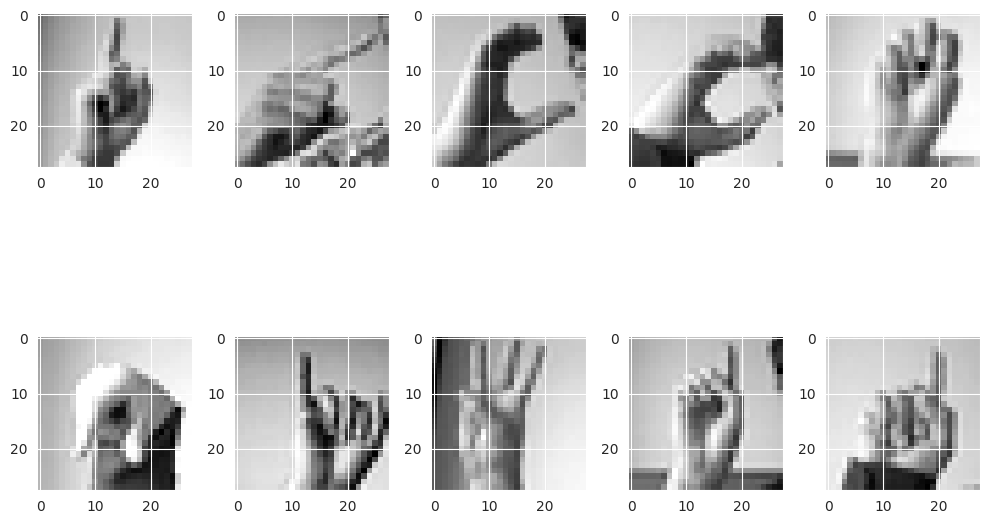

In [56]:
# Normalize the data
x_train = x_train / 255 #divide each pixel by 255, scaling tech, help in acc, fiting fast 0:1
x_test = x_test / 255
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1) #-1 used to retunr one demention, 1 represents the number of channels in the input dat
x_test = x_test.reshape(-1,28,28,1)

f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()   
    
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)


model = Sequential()
#extarction local fetures, and recognize the patterns in data
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1))) #over all feture extraction
model.add(BatchNormalization()) #make scaling for inout data
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same')) 
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2)) 
model.add(BatchNormalization())
                                                    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
#----------------------------------------------------------------------cnn--------
model.add(Flatten()) #input layer 1024
model.add(Dense(units = 512 , activation = 'relu')) #hiden layer
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax')) #output layer 1012 --->512----->24
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()


history = model.fit(datagen.flow(x_train,y_train, batch_size= 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

cm = confusion_matrix(y,class_labels)
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')


In [57]:
#what this function do over all :The ImageDataGenerator is a powerful tool in Keras that allows you to perform various
#data augmentation techniques on the fly while training your neural network. It helps in generating augmented 
#versions of the input images, which can help increase the size and diversity of the training dataset, 
# thus improving the model's generalization ability.
# it's augmentation tech, help in making augmented محسن\معزز varsions of image it's help in genralzing the ability of the model. and this affect to the acc
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [33]:

#learning rate:using for reduce overfitting 
#monitor : to improve acc
#patinence = 
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [58]:
model = Sequential()
#extarction local fetures, and recognize the patterns in data
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1))) #over all feture extraction
model.add(BatchNormalization()) #make scaling for inout data
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same')) 
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2)) 
model.add(BatchNormalization())
                                                    model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
#----------------------------------------------------------------------cnn--------
model.add(Flatten()) #input layer 1024
model.add(Dense(units = 512 , activation = 'relu')) #hiden layer
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax')) #output layer 1012 --->512----->24
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 75)       300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 75)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 50)      

In [59]:
history = model.fit(datagen.flow(x_train,y_train, batch_size= 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 14s 49ms/step - loss: 1.0337 - accuracy: 0.6751 - val_loss: 3.3744 - val_accuracy: 0.1207 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 11s 53ms/step - loss: 0.2128 - accuracy: 0.9293 - val_loss: 1.3478 - val_accuracy: 0.5460 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 10s 48ms/step - loss: 0.1038 - accuracy: 0.9661 - val_loss: 0.0651 - val_accuracy: 0.9812 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 11s 49ms/step - loss: 0.0672 - accuracy: 0.9788 - val_loss: 0.0924 - val_accuracy: 0.9629 - lr: 0.0010
Epoch 5/20
214/215 [============================>.] - ETA: 0s - loss: 0.0412 - accuracy: 0.9873
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [==============================] - 9s 44ms/step - loss: 0.0410 - accuracy: 0.9873 - val_loss: 0.2977 - val_accuracy: 0.9010 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - 1

In [60]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")


225/225 [==============================] - 1s 3ms/step - loss: 0.0022 - accuracy: 0.9999
Accuracy of the model is -  99.98605847358704 %


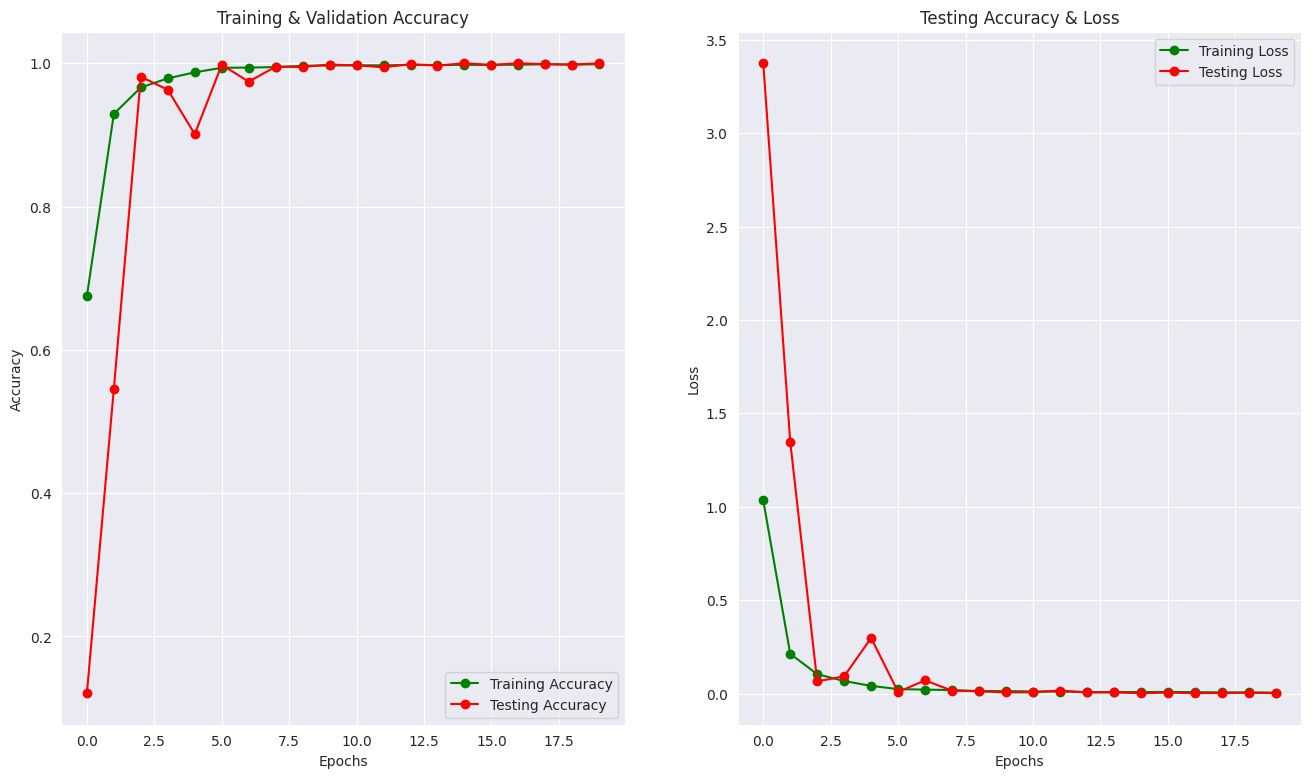

In [61]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [79]:
#
probs = model.predict(x_test)

# Convert probabilities to class labels
class_labels = np.argmax(probs, axis=1)
[],
for i in range(len(probs )):
    if(class_labels [i] >= 9):
        class_labels [i] += 1
class_labels [:5] 


225/225 [==============================] - 0s 2ms/step


array([ 6,  5, 10,  0,  3])

In [80]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y,class_labels, target_names = classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      1.00      1.00       245
     Class 4       1.00      1.00      1.00       498
     Class 5       1.00      1.00      1.00       247
     Class 6       1.00      1.00      1.00       348
     Class 7       1.00      1.00      1.00       436
     Class 8       1.00      1.00      1.00       288
    Class 10       1.00      1.00      1.00       331
    Class 11       1.00      1.00      1.00       209
    Class 12       1.00      1.00      1.00       394
    Class 13       1.00      1.00      1.00       291
    Class 14       1.00      1.00      1.00       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       1.00      1.00      1.00       144
    Class 18       1.00    

<Axes: >

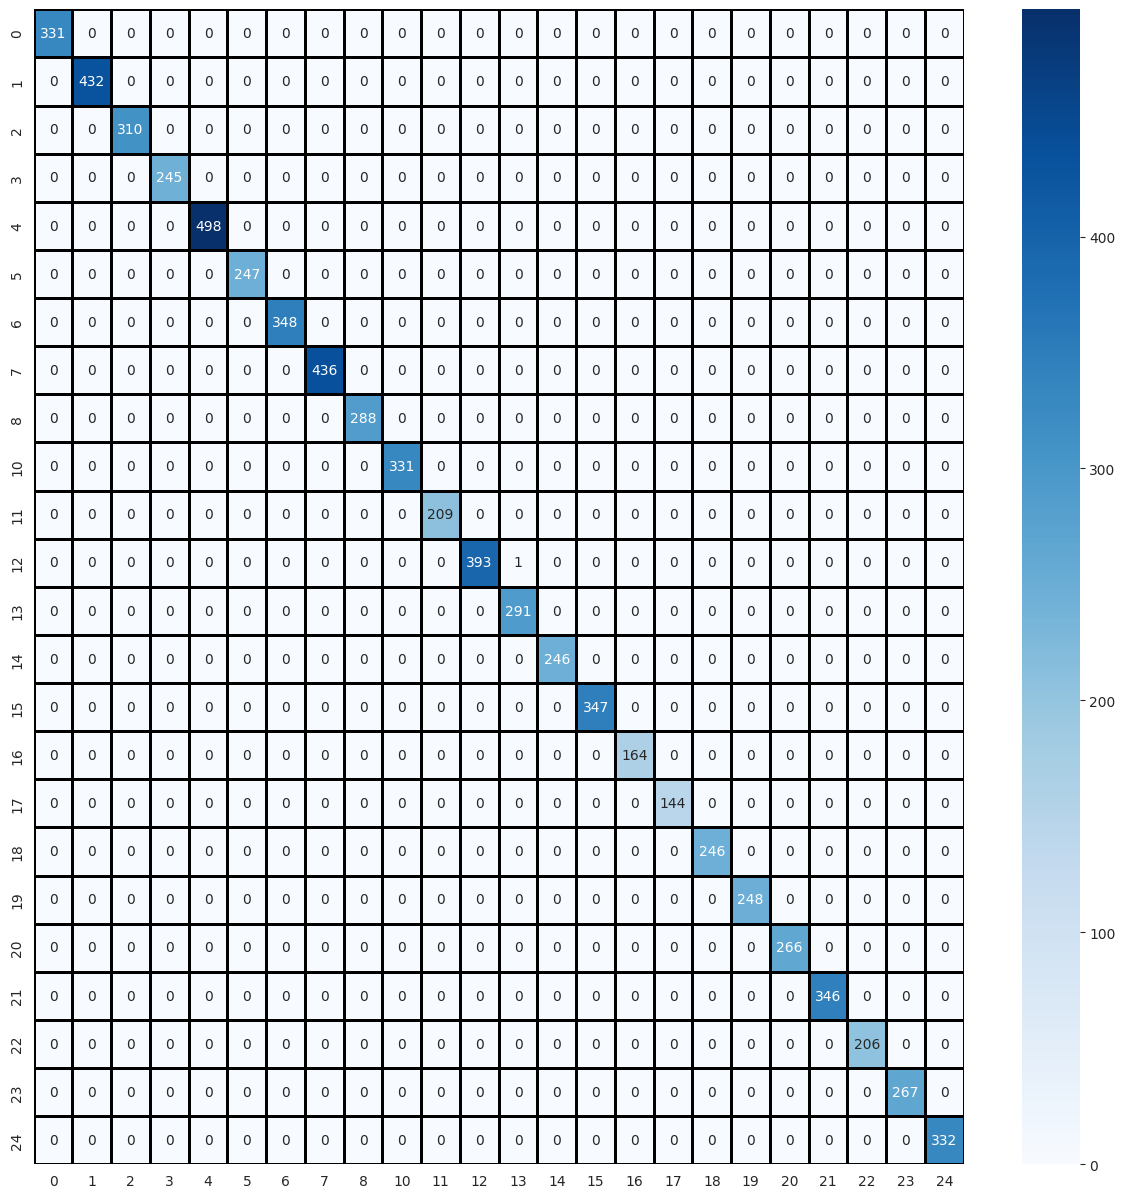

In [82]:
cm = confusion_matrix(y,class_labels)
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [97]:
import numpy as np
y_arr = np.full_like(class_labels, y)

# Check the shapes of class_labels and y_arr
print(class_labels.shape)
print(y_arr.shape)



correct = np.nonzero(class_labels == y_arr)[0]
correct


(7172,)
(7172,)


array([   0,    1,    2, ..., 7169, 7170, 7171])

<ipython-input-98-99052e20696a>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)


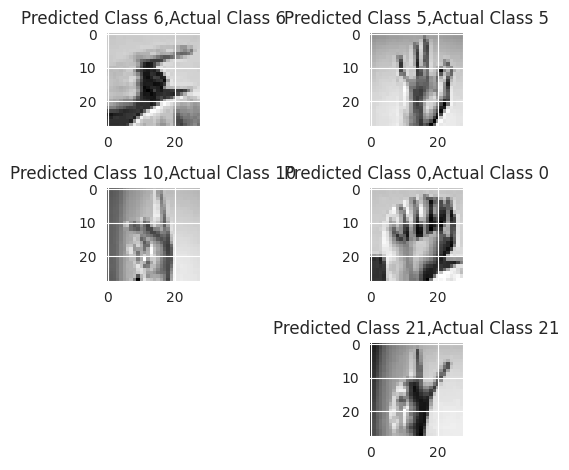

In [98]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(x_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(class_labels[c], y_arr[c]))
    plt.tight_layout()
    i += 1